# Assignment 3: IBM_ HR Analytics

## Contents

1. Importing the Libraries and Loading the dataset
2. Exploring and Preprocessing the data
3. Classification Task
4. Comparison and selection of best performing classification model for given dataset
5. Predict the region using classification based on sample input or user input
6. Regression task
7. Build a Regression model using the training data
8. Evaluate the model on the testing data
9. MSE and R-Square for other Regression models
10. Predict the average price using regression based on sample input or user input

## 1. Importing the Libraries and Loading the dataset

In [118]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import requests
from io import BytesIO
from zipfile import ZipFile



# Loading the dataset 
# Loading the HR dataset from the github url link into a Pandas DataFrame.

# Download the zip file from the GitHub link
url = "https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/raw/master/ibm-hr-analytics-employee-attrition-performance.zip"
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))

# Extract the contents
zip_file.extractall()

# Load the dataset
hr_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## 2. Exploring and Preprocessing the data

- 2.1 explore data table 
- 2.2 Conducted any necessary data cleaning steps.
- 2.3 Explore Target variable, Features, their distribution and Outliers
- 2.4 Correlation matrix and Heatmap
- 2.5 Split the data into features (X), target variable (y), training and testing sets for model evaluation.


### 2.1 Explore data table

In [126]:
# Check the column names before dropping
print(hr_data.columns)



# Encode categorical variables
label_encoder = LabelEncoder()
hr_data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
hr_data['Department'] = label_encoder.fit_transform(data['Department'])
hr_data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
hr_data['Gender'] = label_encoder.fit_transform(data['Gender'])
hr_data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
hr_data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
hr_data['OverTime'] = label_encoder.fit_transform(data['OverTime'])
hr_data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

# Display the first few rows of the dataset

hr_data.head()


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [127]:
# Check data types 

print(hr_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [128]:
# Check  statistics

print(hr_data.describe())

               Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       1470.000000  1470.000000     1470.000000         1470.0   
mean           9.192517     2.912925        2.247619            1.0   
std            8.106864     1.024165        1.331369            0.0   
min            1.00000

### 2.2 Conducting any necessary data cleaning steps

- Checked for missing values in the dataset.
- In this case, no missing values were found, so no imputation is needed.

In [129]:
# Check for missing values

print(hr_data.isnull().sum())

# Drop any rows with missing values

hr_data = hr_data.dropna()



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 2.3 Exploratory Data Analysis

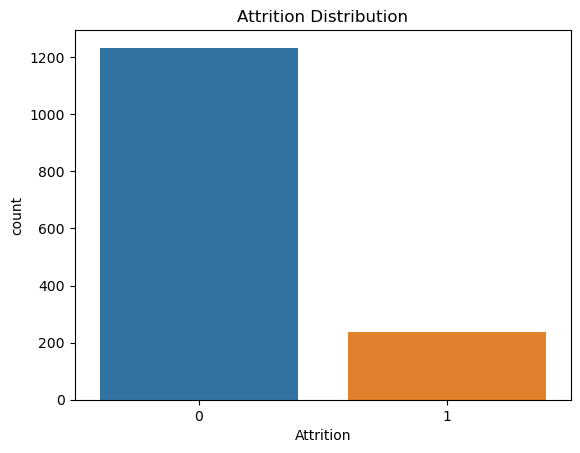

In [130]:
# Visualize the distribution of the target variable 'Attrition'
sns.countplot(x='Attrition', data=hr_data)
plt.title('Attrition Distribution')
plt.show()



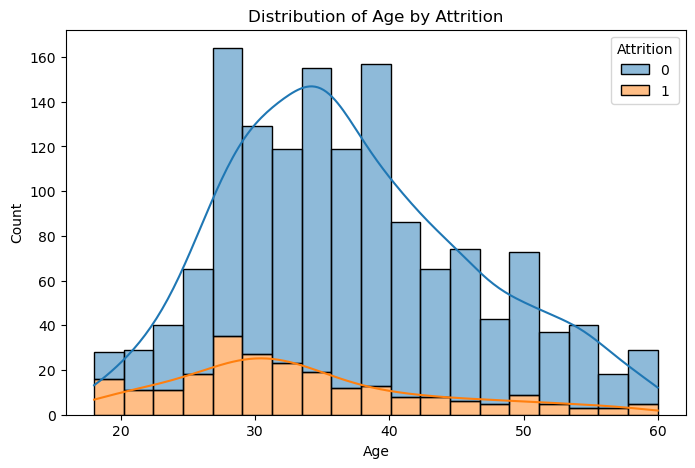

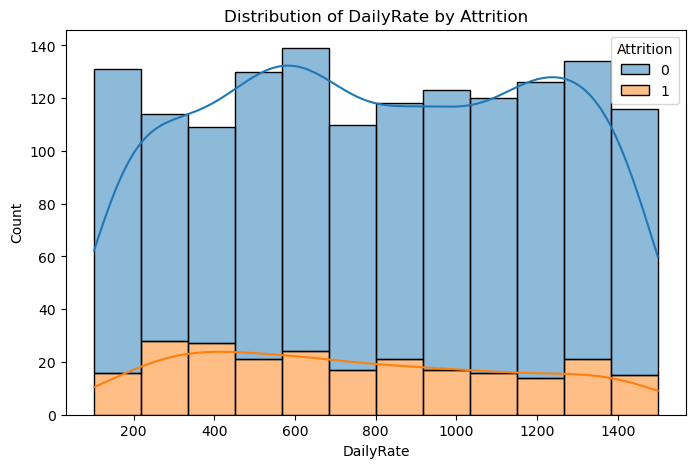

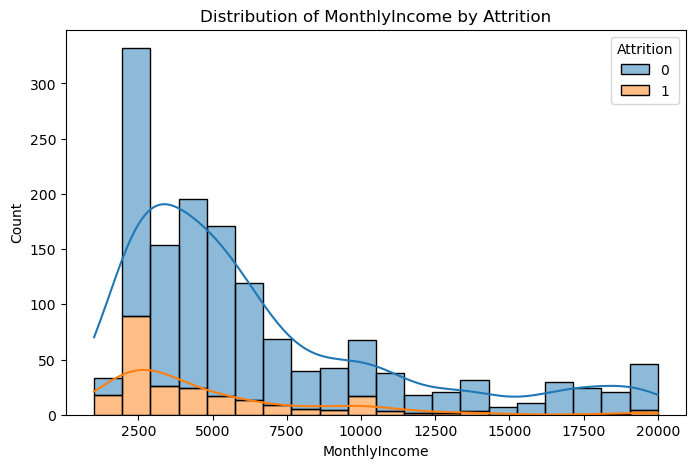

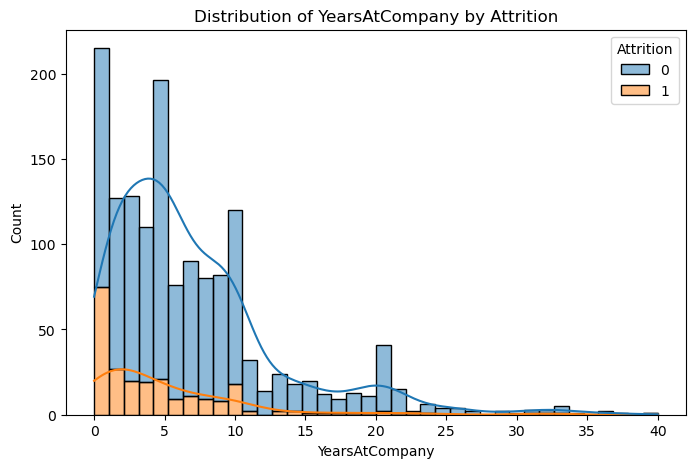

In [131]:
# Visualize the distribution of numerical features by Attrition status
numerical_features = ['Age', 'DailyRate', 'MonthlyIncome', 'YearsAtCompany']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(hr_data, x=feature, hue='Attrition', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} by Attrition')
    plt.show()



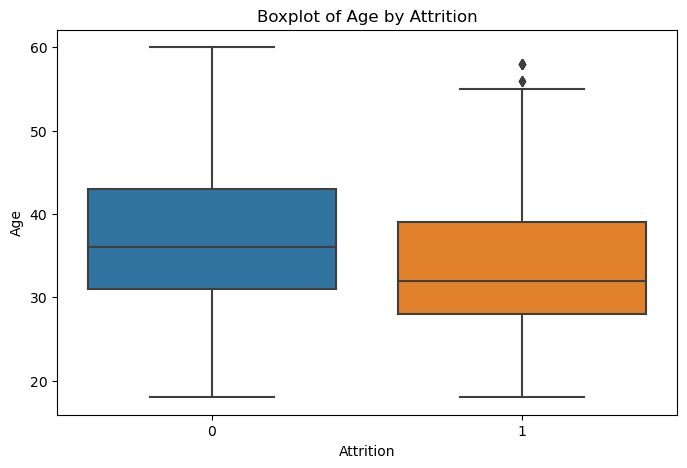

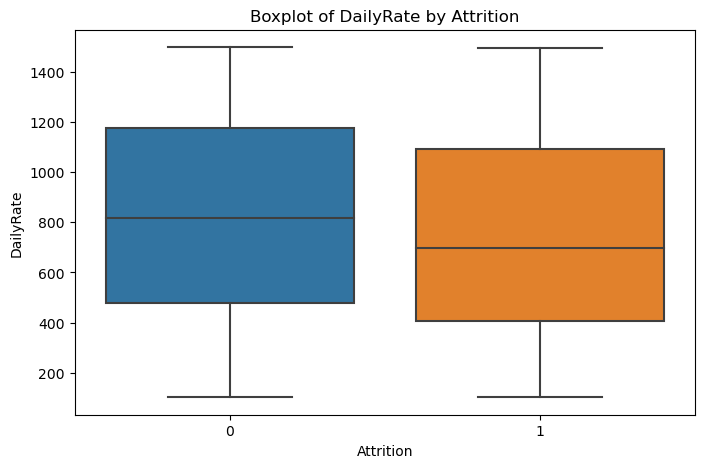

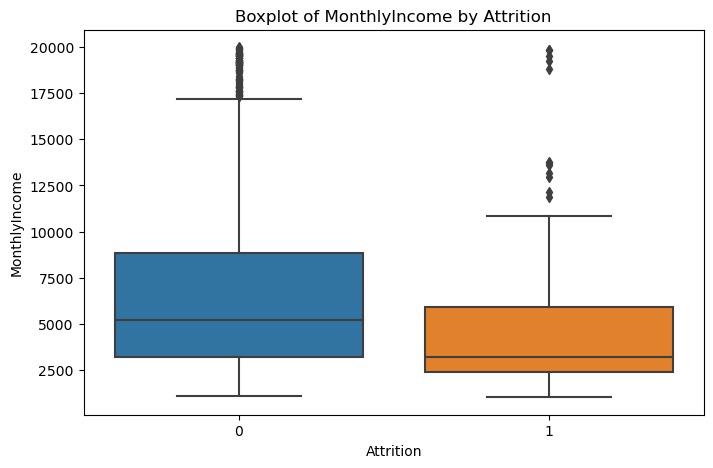

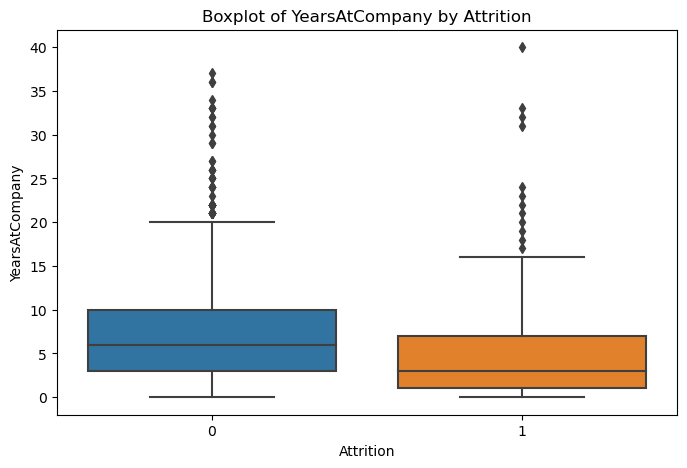

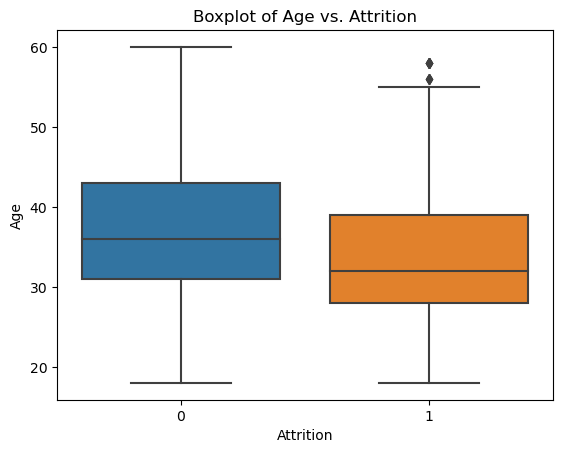

In [132]:

# Boxplot to identify outliers for selected numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Attrition', y=feature, data=hr_data)
    plt.title(f'Boxplot of {feature} by Attrition')
    plt.show()

# Boxplot to identify outliers
sns.boxplot(x='Attrition', y='Age', data=hr_data)
plt.title('Boxplot of Age vs. Attrition')
plt.show()

### 2.4 Correlation matrix and Heatmap

C:\Users\namit\AppData\Local\Temp\ipykernel_7320\1754294426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hr_data.corr()


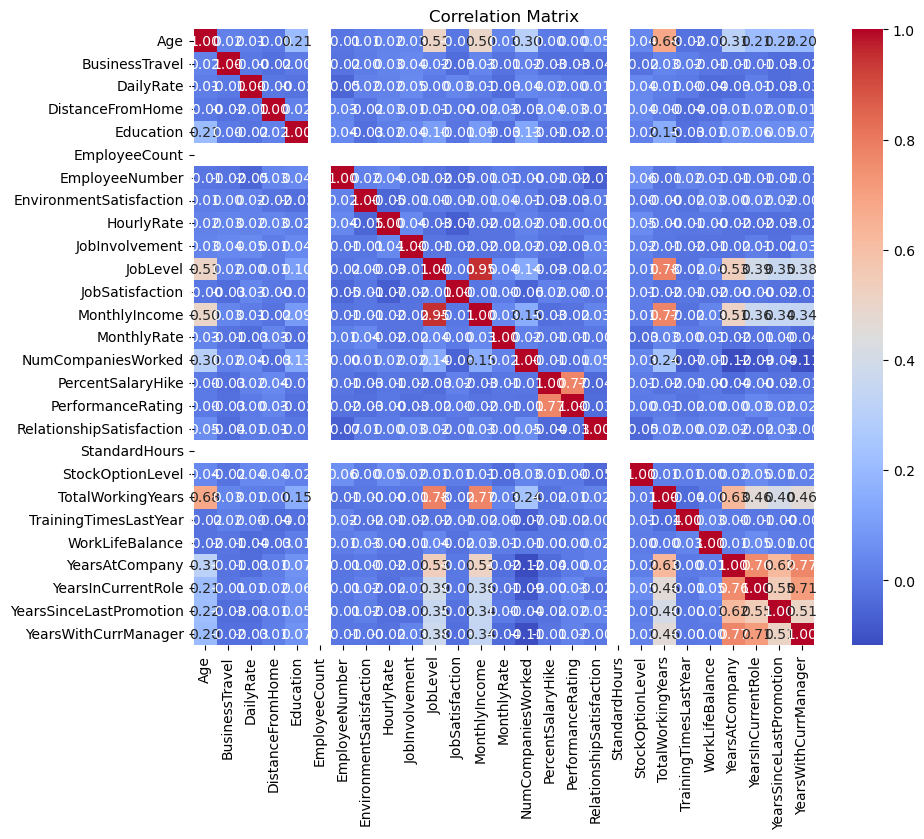

In [74]:
# Visualize the correlation matrix
correlation_matrix = hr_data.corr()

## Create a Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



### 2.5 Explore Target variable, Features, their distribution and Outliers

- explore target variable
- initialize classifiers
- evaluate the model 


In [139]:
# Identify the target variable
target = hr_data['Attrition']

# Drop the target variable from features
features = hr_data.drop('Attrition', axis=1)

# One-hot encode categorical variables in features
features = pd.get_dummies(features, drop_first=True)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize classifiers
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42),  
}
classifiers = [random_forest, gradient_boosting]


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)

    # Print the evaluation metrics
    print(f'Model: {classifier.__class__.__name__}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    print('-' * 50)

Model: RandomForestClassifier
Accuracy: 0.8775510204081632
Confusion Matrix:
[[254   1]
 [ 35   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

--------------------------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.8877551020408163
Confusion Matrix:
[[248   7]
 [ 26  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.33      0.44        39

    accuracy                           0.89       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.87      0.89      0.87       294

---------------------------------------------

## 3. Classification Task:
- Create a classification model to predict the region based on other features.


In [133]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    # ...),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}



## 4. Comparison and selection of best performing classification model for given dataset


In [147]:


# Find the best fit model using cross-validation
best_model = None
best_accuracy = 0

for classifier in classifiers:
    scores = cross_val_score(classifier, features, target, cv=5)
    mean_accuracy = scores.mean()
    
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = name


# Display the best model and its accuracy
print(f'Best Model: {best_model[0]}')
print(f'Best Accuracy: {best_accuracy}')

The best fit model is: k-Nearest Neighbors with an average accuracy of 0.86
Best Model: k
Best Accuracy: 0.8612244897959185
